In [ ]:
import numpy as np
from keras.datasets import mnist

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten, Dense
from keras.utils import to_categorical

In [ ]:
import random as rd

In [ ]:
# to calculate accuracy
from sklearn.metrics import accuracy_score

# loading the dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
import matplotlib.pyplot as plt

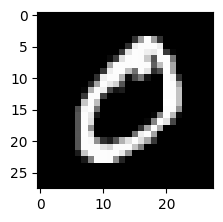

In [ ]:
plt.figure(figsize=[5,5])

# Display the first image in training data
plt.subplot(121)
plt.imshow(X_train[1,:,:], cmap='gray')
#plt.title("Ground Truth : {}".format(y_train[0]))

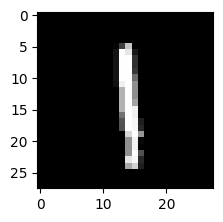

In [ ]:
plt.figure(figsize=[5,5])

# Display the first image in training data
plt.subplot(121)
plt.imshow(X_train[8,:,:], cmap='gray')
#plt.title("Ground Truth : {}".format(y_train[0]))

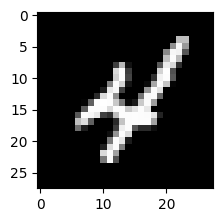

In [ ]:
plt.figure(figsize=[5,5])

# Display the first image in training data
plt.subplot(121)
plt.imshow(X_train[9,:,:], cmap='gray')
#plt.title("Ground Truth : {}".format(y_train[0]))

In [ ]:
# building the input vector from the 28x28 pixels
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [ ]:
# normalizing the data to help with the training
X_train /= 255
X_test /= 255

In [ ]:
# one-hot encoding using keras' numpy-related utilities
n_classes = 10
print("Shape before one-hot encoding: ", y_train.shape)
Y_train = to_categorical(y_train, n_classes)
Y_test = to_categorical(y_test, n_classes)
print("Shape after one-hot encoding: ", Y_train)

Shape before one-hot encoding:  (60000,)
Shape after one-hot encoding:  [[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


In [ ]:
# building a linear stack of layers with the sequential model
model = Sequential()

In [ ]:
# convolutional layer
model.add(Conv2D(25, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu', input_shape=(28,28,1)))
model.add(MaxPool2D(pool_size=(1,1)))

In [ ]:
model.add(Flatten())

In [ ]:
# output layer
model.add(Dense(10, activation='softmax'))

In [ ]:
# compiling the sequential model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [ ]:
model.evaluate(X_test, Y_test)

313/313 [==============================] - 2s 4ms/step - loss: 2.3064 - accuracy: 0.1006


[2.306389093399048, 0.1005999967455864]

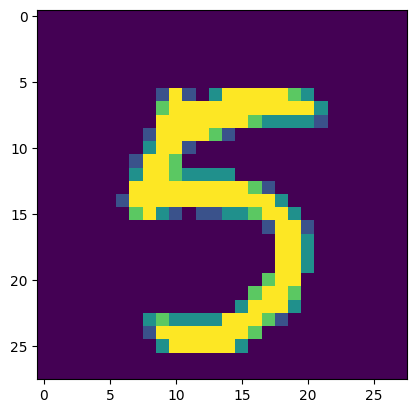

In [ ]:
idx2 = rd.randint(3, len(Y_test))
plt.imshow(X_test[idx2, :])
plt.show()

In [ ]:
model.predict(X_test[:5])

1/1 [==============================] - 0s 127ms/step


array([[0.09678606, 0.10086516, 0.09631392, 0.10402581, 0.1002899 ,
        0.09499776, 0.1024427 , 0.10756907, 0.09583996, 0.10086969],
       [0.10525955, 0.08678489, 0.09636237, 0.10965578, 0.09403807,
        0.09181972, 0.09990802, 0.125652  , 0.08760389, 0.10291569],
       [0.09867731, 0.10188574, 0.1059721 , 0.10374408, 0.0986331 ,
        0.09558328, 0.09928012, 0.10374349, 0.09696247, 0.0955183 ],
       [0.11606923, 0.10290308, 0.10423315, 0.11422278, 0.08310632,
        0.08245073, 0.07868811, 0.11583608, 0.09738372, 0.10510675],
       [0.10516515, 0.09901823, 0.09782682, 0.10225706, 0.09303871,
        0.09642897, 0.09674881, 0.11072525, 0.10817929, 0.0906117 ]],
      dtype=float32)